<a href="https://colab.research.google.com/github/jpengtelecom/Trabalho_4PAM/blob/main/Demodulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

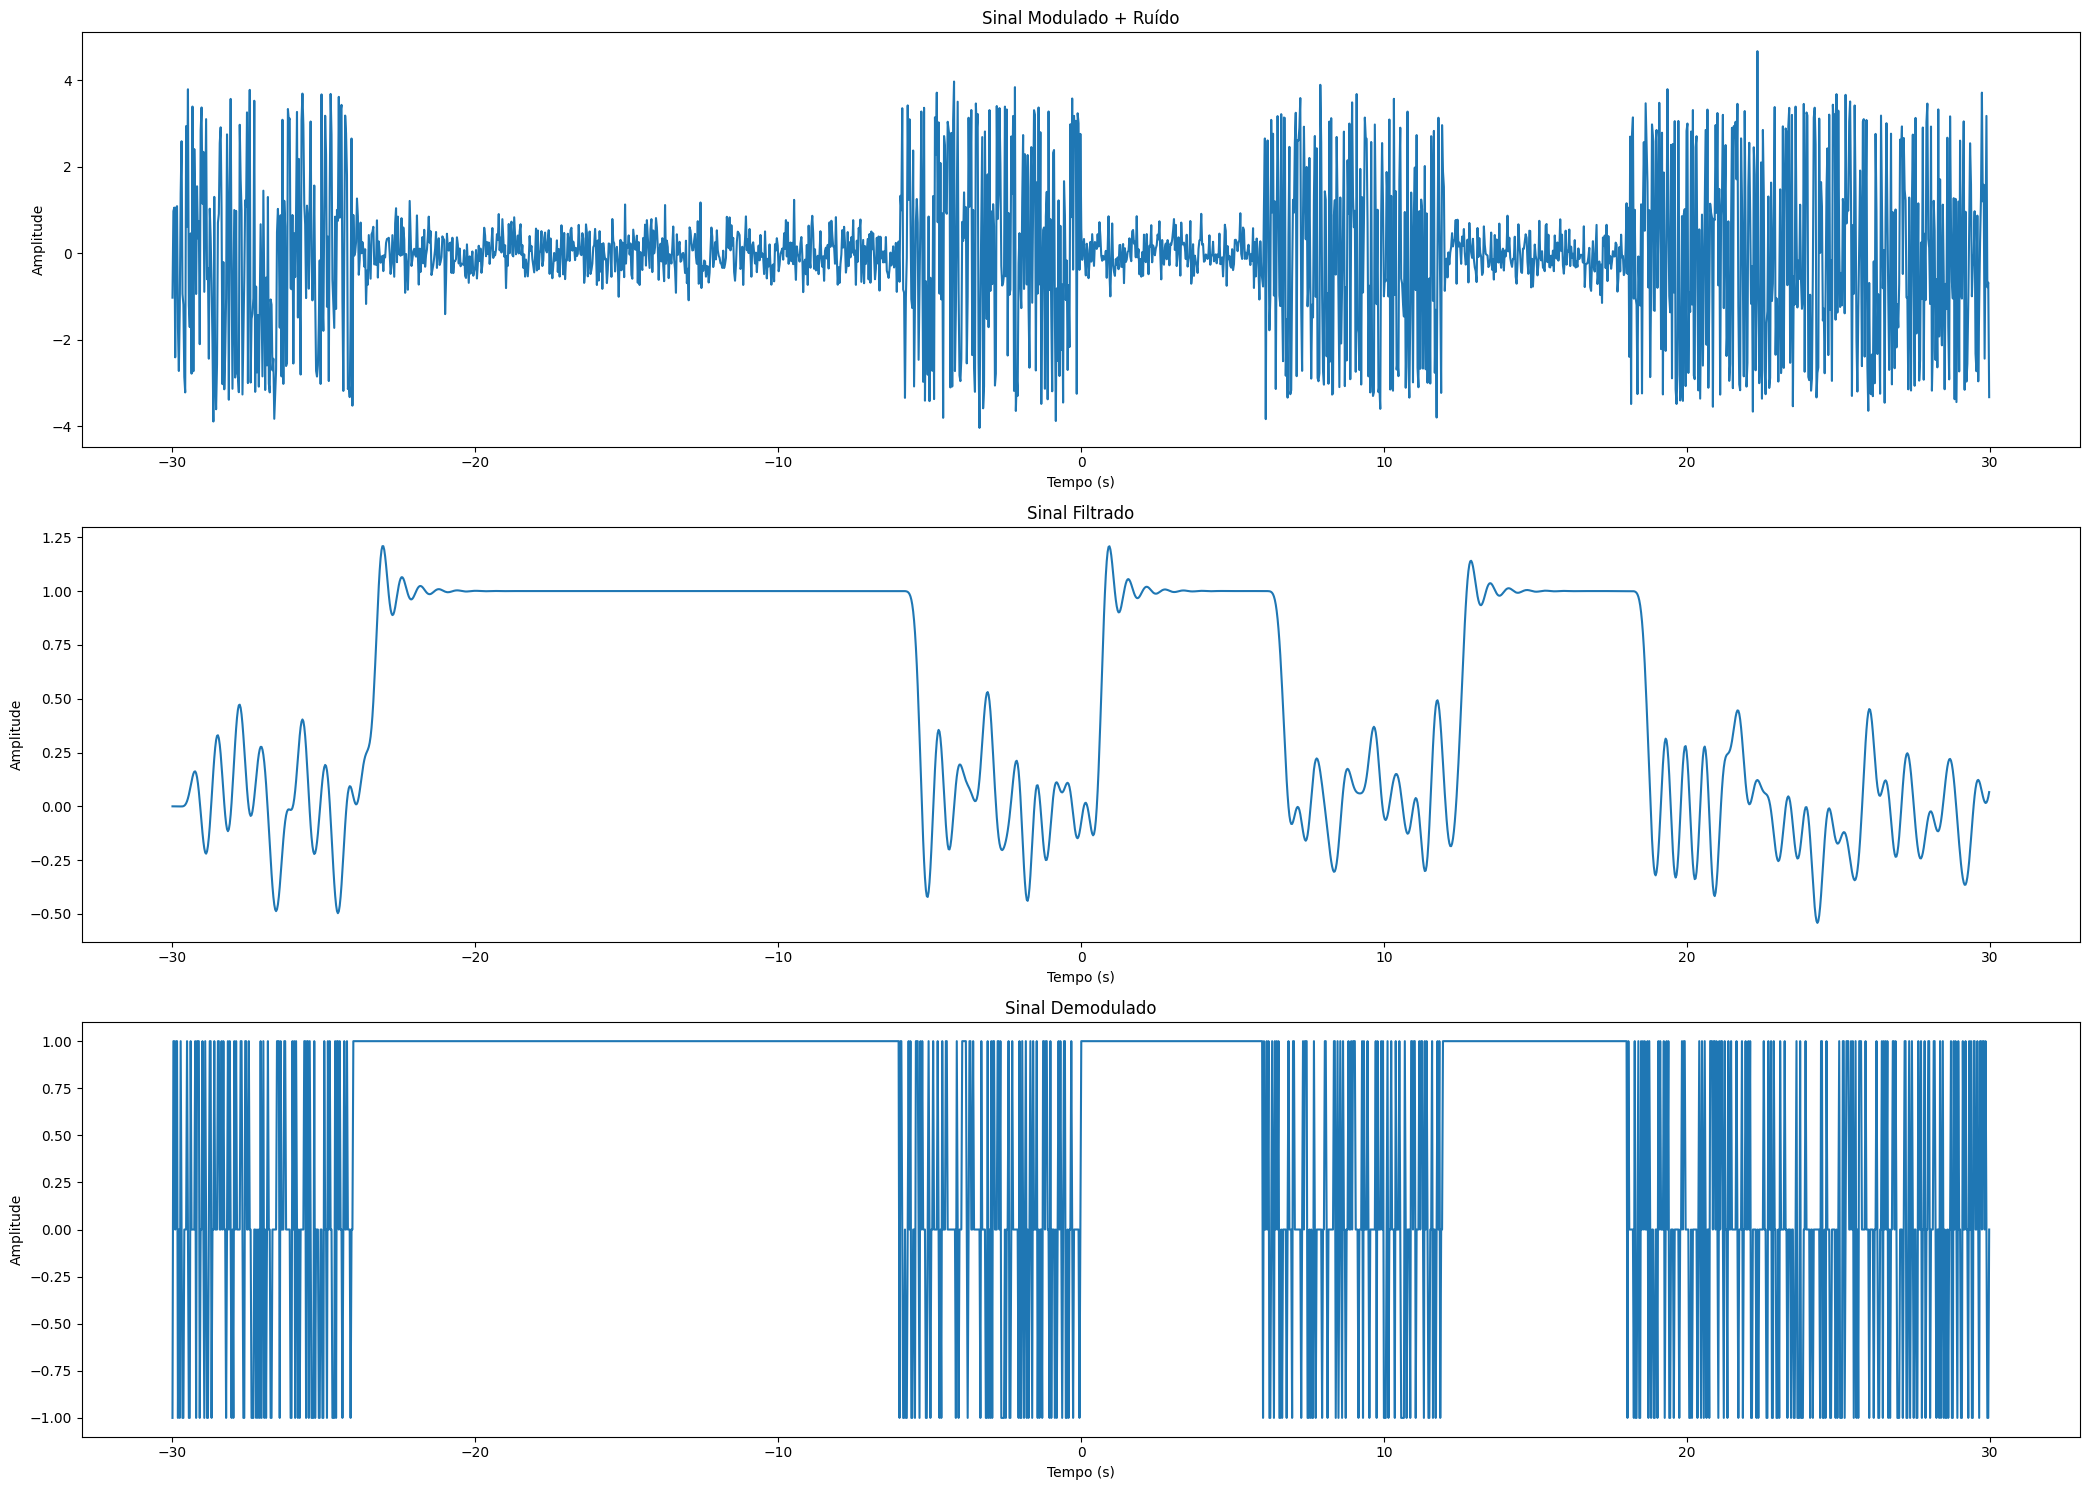

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.special import erfc
from scipy import special
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import firwin, lfilter
from scipy.io import wavfile
from scipy.io.wavfile import write
from scipy.signal import welch
from scipy import signal
from scipy.signal import lfilter

# Parametros

N = 2000  # amostragem
p = 30
t = np.linspace(-p,p,N,endpoint=False)




# Portadora
data=(np.random.rand(10)>0.5)
data=(np.random.rand(10)>0.5)
portadora = np.repeat(data,200)

mensagem = np.random.randint(0, 4, N)
amplitude = [-3, -1, 1, 3]
sinal_mensagem = np.array([amplitude[i] for i in mensagem])



# Sinal PAM
sinal = sinal_mensagem * portadora

# Adicionando ruído
ruido = np.random.normal(0, 0.4, size=N)
sinal_ruidoso = sinal + ruido





# Demodulação por limiar
limiar = [0, 1, 2]
sinal_demodulado = np.zeros_like(sinal)

for i, idx in enumerate(limiar):
    sinal_demodulado[np.abs(sinal - amplitude[i]) < idx] = amplitude[i]

# Filtragem
ordem = 10  # Ordem do filtro
frequencia_corte = 0.1  # Frequência de corte do filtro

b, a = signal.butter(ordem, frequencia_corte, 'low')
sinal_filtrado = lfilter(b, a, sinal_demodulado)

# Plotagem
plt.figure(figsize=(21, 15))

plt.subplot(3, 1, 1)
plt.plot(t, sinal_ruidoso)
plt.title('Sinal Modulado + Ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, sinal_filtrado)
plt.title('Sinal Filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, sinal_demodulado)
plt.title('Sinal Demodulado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
